# 4. What is the longest match recorded in terms of duration?

In [2]:
import pandas as pd

MatchTimeInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchTimeInfo.csv")
MatchTimeInfo.head(5)
MatchTimeInfo = MatchTimeInfo.drop_duplicates(subset="match_id")
# Calculate the total duration of each match by summing the periods
MatchTimeInfo['total_duration'] = MatchTimeInfo[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1)
MatchTimeInfo = MatchTimeInfo[MatchTimeInfo['total_duration'] > 0]
MatchTimeInfo['total_duration_hours'] = MatchTimeInfo['total_duration'] / 3600
# Perform a sanity check by filtering out any unreasonably long matches (e.g., > 24 hours)
reasonable_matches = MatchTimeInfo[MatchTimeInfo['total_duration'] <= 12*3600]
# Find the match with the longest duration
longest_match = reasonable_matches.loc[reasonable_matches['total_duration'].idxmax()]
longest_match_hours = longest_match/3600
print("Longest match recorded in terms of duration:")
print(f"Match ID: {longest_match['match_id']}")
print(f"Duration: {longest_match['total_duration']} seconds, equal to {longest_match_hours['total_duration']} hours" )



Longest match recorded in terms of duration:
Match ID: 12346456.0
Duration: 30465.0 seconds, equal to 8.4625 hours


In [4]:
reasonable_matches.sort_values(by='total_duration', ascending=False)

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,total_duration,total_duration_hours
18916,12346456,25797.0,2887.0,1781.0,NaN,NaN,1.717186e+09,30465.0,8.462500
4574,12313669,3595.0,2489.0,22415.0,NaN,NaN,1.715202e+09,28499.0,7.916389
16996,12371237,24798.0,1816.0,1722.0,NaN,NaN,1.716828e+09,28336.0,7.871111
19304,12381286,26030.0,2206.0,NaN,NaN,NaN,1.717094e+09,28236.0,7.843333
19394,12346345,2878.0,2734.0,19016.0,2553.0,NaN,1.717258e+09,27181.0,7.550278
...,...,...,...,...,...,...,...,...,...
3451,12311868,5.0,5.0,NaN,NaN,NaN,1.715072e+09,10.0,0.002778
8795,12334984,5.0,5.0,NaN,NaN,NaN,1.715763e+09,10.0,0.002778
3347,12311067,5.0,4.0,NaN,NaN,NaN,1.715085e+09,9.0,0.002500
105,12291498,3.0,5.0,NaN,NaN,NaN,1.714558e+09,8.0,0.002222


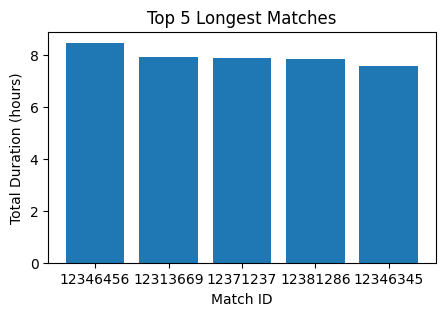

In [3]:
import matplotlib.pyplot as plt

# Plotting the top 5 longest matches
top_5_longest = reasonable_matches.nlargest(5, 'total_duration_hours')
plt.figure(figsize=(5, 3))
plt.bar(top_5_longest['match_id'].astype(str), top_5_longest['total_duration_hours'])
plt.xlabel('Match ID')
plt.ylabel('Total Duration (hours)')
plt.title('Top 5 Longest Matches')
plt.show()